In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
#df = pd.read_csv('/home/aapostolakis/Documents/ffpcode/ml-fires-1/ML_fires_al/results/hyperopt/hyperopt_results_tensorflow_NN_700_50_scores_aucval_1.csv')
#df = pd.read_csv('/home/aapostolakis/Documents/ffpcode/ml-fires-1/ML_fires_al/results/hyperopt/hyperopt_results_tensorflow_NN_200_scores_aucval_1.csv')
#df = pd.read_csv('/home/aapostolakis/Documents/ffpcode/ml-fires-1/ML_fires_al/results/hyperopt/hyperopt_results_tensorflow_NN_1750_200_scores_aucval_1.csv')
#df = pd.read_csv('/home/aapostolakis/Documents/ffpcode/ml-fires-1/ML_fires_al/results/hyperopt/hyperopt_results_sklearn_RF_scores_aucval_1.csv')
df = pd.read_csv('/home/aapostolakis/Documents/ffpcode/ml-fires-1/ML_fires_al/results/hyperopt/hypres_tf_NN_scores_aucval_1.csv')

In [3]:
totalrows=len(df.index)
totalrows


25793

In [4]:
def firegroupby(classnum, classname, col, cutscheme):
    dffire = df[df['fire']==classnum]
    classtotal = len(dffire.index)
    print(len(dffire.index))
    tgroups = dffire.groupby(pd.cut(dffire[col], cutscheme)).count()
    print(tgroups['id'].sum())
    tgroups.rename(columns={'id': classname}, inplace=True)
    tgroups = tgroups[[classname]]
    tgroups[classname+' rate'] = tgroups[classname]/classtotal
    tgroups[classname+' sum'] = tgroups[classname].cumsum()
    dffire=None
    return tgroups
    

In [5]:
cutscheme = np.arange(0, 1.1, 0.1)

In [6]:
groupsfire = firegroupby(1, 'actual fire (TPR)', '1', cutscheme)
groupsnof = firegroupby(0, 'no fire (TNR)', '1', cutscheme)

11236
11236
12577
12577


In [7]:
thressgroups = pd.concat([groupsfire,groupsnof], axis=1)

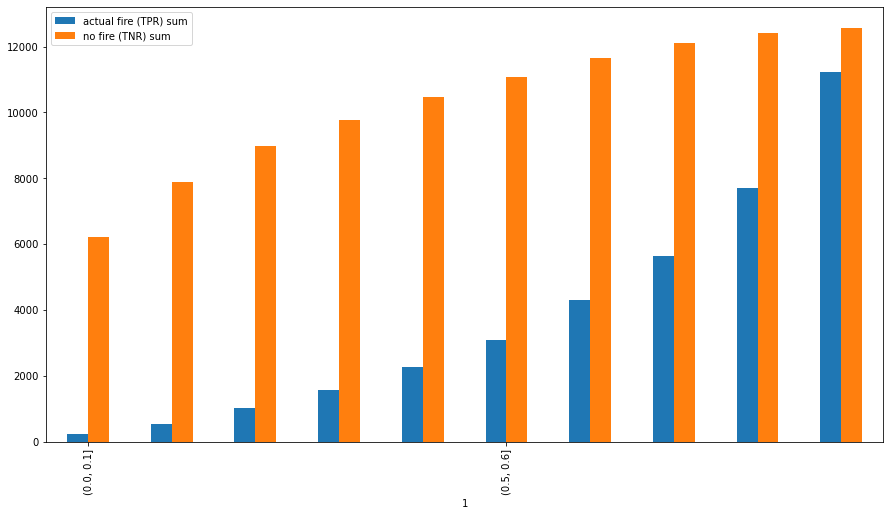

In [8]:
ax2 = thressgroups[['actual fire (TPR) sum', 'no fire (TNR) sum']].plot.bar(figsize=(15,8))
ax2.xaxis.set_major_locator(ticker.MultipleLocator(5))

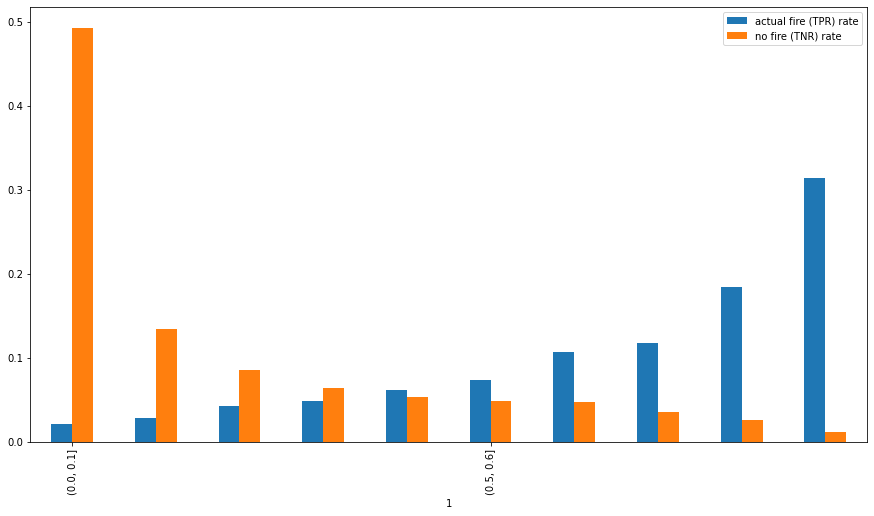

In [9]:
ax2 = thressgroups[['actual fire (TPR) rate', 'no fire (TNR) rate']].plot.bar(figsize=(15,8))
ax2.xaxis.set_major_locator(ticker.MultipleLocator(5))

In [10]:
thressgroups

,actual fire (TPR),actual fire (TPR) rate,actual fire (TPR) sum,no fire (TNR),no fire (TNR) rate,no fire (TNR) sum
1,,,,,,
"(0.0, 0.1]",238,0.021182,238,6205,0.493361,6205
"(0.1, 0.2]",312,0.027768,550,1692,0.134531,7897
"(0.2, 0.3]",477,0.042453,1027,1081,0.085951,8978
"(0.3, 0.4]",550,0.048950,1577,807,0.064165,9785
"(0.4, 0.5]",694,0.061766,2271,677,0.053828,10462
"(0.5, 0.6]",832,0.074048,3103,604,0.048024,11066
"(0.6, 0.7]",1204,0.107156,4307,596,0.047388,11662
"(0.7, 0.8]",1326,0.118014,5633,443,0.035223,12105
"(0.8, 0.9]",2075,0.184674,7708,320,0.025443,12425
